In [20]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt

In [14]:
df = pd.read_table('df.csv')

In [15]:
df.describe()

,Glucose_Before,Glucose_After,Insulin_Before,Insulin_After
count,40.000000,40.000000,40.000000,40.000000
mean,9.685883,8.511982,8.665930,10.168415
std,1.683078,1.862413,2.027438,2.675175
min,5.859981,3.406429,4.544661,6.156825
25%,8.526653,7.282921,7.055487,8.061644
50%,9.258638,8.529556,8.712898,9.561984
75%,11.085242,9.932888,10.002762,11.765272
max,12.808895,11.894115,12.784731,15.830221


In [16]:
df.head()

,Group,Glucose_Before,Glucose_After,Insulin_Before,Insulin_After
0,A,7.871554,5.502870,6.389267,8.616558
1,A,10.996018,8.250652,4.544661,8.339524
2,A,9.924468,8.392385,7.218200,10.532472
3,A,7.240558,4.652643,9.147612,10.821346
4,A,8.632100,7.259040,8.677178,13.094477


Нормальность распределения уровня глюкозы после лечения в обеих группах проверяем при помощи критерия Шапиро-Уилка, т.к. он хорошо работает на выборке менее 50.
#### __Нулевая гипотеза для проверки нормальности распределения уровня глюкозы после лечения в группе A:__
Уровень глюкозы в группе A подчиняется нормальному распределению.

In [63]:
values_a = df[df['Group'] == 'A']
values_b = df[df['Group'] == 'B']

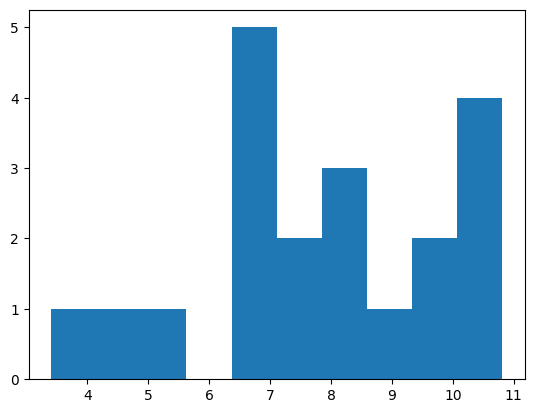

In [64]:
plt.hist(values_a['Glucose_After'], bins = 10)
plt.show()

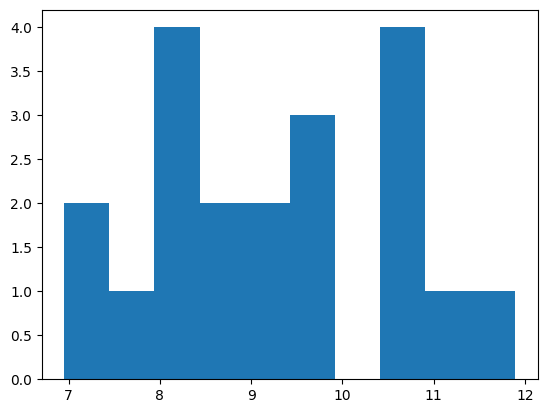

In [65]:
plt.hist(values_b['Glucose_After'], bins = 10)
plt.show()

In [53]:
shapiro_a = sts.shapiro(values_a['Glucose_After'])
shapiro_b = sts.shapiro(values_b['Glucose_After'])
print(f'{shapiro_a}, \n{shapiro_b}')

ShapiroResult(statistic=np.float64(0.9657716447255266), pvalue=np.float64(0.6642805235682276)), 
ShapiroResult(statistic=np.float64(0.9696339898594359), pvalue=np.float64(0.7471250188629206))


В обоих случаях p > 0.05 принимаю Н0, данные уровня глюкозы после лечения распределены нормально в обеих группах. 

Для сравнения уровня глюкозы между группами после лечения использую t-критерий для независимых выборок, т.к. распределение нормальное и выборки независимые.
#### __Нулевая гипотеза для сравнения уровня глюкозы между группами А и В после лечения:__
Средний уровень глюкозы в группе A не отличается от среднего уровня глюкозы в группе B.

Для оценки изменения уровня инсулина в группе А после лечения использую t-критерий для парных выборок.
#### __Нулевая гипотеза для проверки среднего уровня глюкозы в группе А поле лечения:__
Средний уровень глюкозы в группе A не изменился после лечения.


Для оценки корреляции между изменениями уровня инсулина и инсулина в группе А использую коэффициент корреляции Пирсона.
#### __Нулевая гипотеза для проверки наличия связи между изменением уровня глюкозы и изменением уровня инсулина в группе A:__
Между изменением уровня глюкозы и изменением уровня инсулина в группе A нет связи.


Для оценки разницы в уровне глюкозы до лечения между группами A и B использую t-критерий для двух независимых выборок.

Для оценки изменения уровня глюкозы в группе B после лечения использую t-критерий для парных выборок 

Для оценки связи между изменением уровня глюкозы и изменением уровня инсулина в группе B использую коэффициент корреляции Пирсона

In [60]:
round(values_a['Glucose_Before'].mean(),2)

np.float64(9.67)

In [59]:
round(values_a['Glucose_After'].mean(), 2)

np.float64(7.81)

In [61]:
round(values_a['Insulin_Before'].mean(),2)

np.float64(8.89)

In [62]:
round(values_a['Insulin_After'].mean(), 2)

np.float64(11.68)

Для проверки гипотезы о равенстве дисперсий уровня глюкозы между группами A и B после лечения использую критерий Левина

#### __Нулевая гипотеза для проверка равенства дисперсий уровня глюкозы между группами A и B после лечения:__
Дисперсии уровня глюкозы в группах A и B равны.


In [73]:
a = values_a['Glucose_After']
b = values_b['Glucose_After']
sts.levene(a, b)

LeveneResult(statistic=np.float64(2.3525317176907605), pvalue=np.float64(0.1333643020093815))